 ### Exploratory Data Analysis

In [1]:
# importar bbibliotecas 


import pandas as pd
import numpy as np
import sidetable as stb
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import warnings

plt.style.use('bmh')
warnings.filterwarnings('ignore')
pd.options.plotting.backend = 'plotly'

In [2]:
data = pd.read_csv(r'C:\Users\Pedro\Desktop\Estudos\Databases\restaurant.csv')

### Tipos de dados e valores Missing 

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


(1000, 10)

In [4]:
data.stb.missing(style = True)
data = data.dropna()
data.shape

(893, 10)

In [5]:
data.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
item_type,893,2,Fastfood,619,Beverages,274
transaction_type,893,2,Cash,476,Online,417
received_by,893,2,Mr.,459,Mrs.,434
item_price,893,5,20,375,60,117
time_of_sale,893,5,Evening,185,Morning,168
item_name,893,7,Cold coffee,138,Sandwich,117
quantity,893,15,10,77,11,44
transaction_amount,893,48,300,55,700,3
date,893,339,02-03-2023,7,03-12-2023,1
order_id,893,893,2,1,2,1


In [6]:
# Frequência de valores

data.stb.freq(['item_name'], style = True)

,item_name,count,percent,cumulative_count,cumulative_percent
0,Cold coffee,138,15.45%,138,15.45%
1,Sugarcane juice,136,15.23%,274,30.68%
2,Panipuri,135,15.12%,409,45.80%
3,Frankie,127,14.22%,536,60.02%
4,Vadapav,121,13.55%,657,73.57%
5,Aalopuri,119,13.33%,776,86.90%
6,Sandwich,117,13.10%,893,100.00%


 <strong> O item com mais frequência de venda é Cold Coffe e com menos é o Sandwich. <strong>

In [7]:
data.stb.freq(['time_of_sale'], style = True)

,time_of_sale,count,percent,cumulative_count,cumulative_percent
0,Evening,185,20.72%,185,20.72%
1,Night,182,20.38%,367,41.10%
2,Afternoon,181,20.27%,548,61.37%
3,Midnight,177,19.82%,725,81.19%
4,Morning,168,18.81%,893,100.00%


<strong> O período com mais frequência de vendas são de noite e de tarde. <strong>

In [8]:
data.stb.freq(['item_name'], value = 'item_price')

,item_name,item_price,percent,cumulative_item_price,cumulative_percent
0,Sandwich,7020,23.564955,7020,23.564955
1,Frankie,6350,21.315878,13370,44.880832
2,Cold coffee,5520,18.529708,18890,63.410540
3,Sugarcane juice,3400,11.413226,22290,74.823766
4,Panipuri,2700,9.063444,24990,83.887210
5,Vadapav,2420,8.123531,27410,92.010742
6,Aalopuri,2380,7.989258,29790,100.000000


In [9]:
data.groupby('item_name')['item_price'].max().sort_values(ascending = False).reset_index()

,item_name,item_price
0,Sandwich,60
1,Frankie,50
2,Cold coffee,40
3,Sugarcane juice,25
4,Aalopuri,20
5,Panipuri,20
6,Vadapav,20


<strong> O Produto mais caro do menu é o Sandwich. <strong>

In [10]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening


In [11]:
data.stb.freq(['item_type', 'item_name'], style = True)

,item_type,item_name,count,percent,cumulative_count,cumulative_percent
0,Beverages,Cold coffee,138,15.45%,138,15.45%
1,Beverages,Sugarcane juice,136,15.23%,274,30.68%
2,Fastfood,Panipuri,135,15.12%,409,45.80%
3,Fastfood,Frankie,127,14.22%,536,60.02%
4,Fastfood,Vadapav,121,13.55%,657,73.57%
5,Fastfood,Aalopuri,119,13.33%,776,86.90%
6,Fastfood,Sandwich,117,13.10%,893,100.00%


<strong> A bebida mais vendida é o Cold Coffe e a comida mais vendida é o Panipuri.<strong>

In [12]:
# Tratar a coluna de datas
date = []

for x in data['date'].values:
    if '/' in x:
        x = x.replace('/', '-')
    date.append(x)

In [13]:
data['date'] = date
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.to_datetime(data['date']).dt.year
data['month'] = pd.to_datetime(data['date']).dt.month
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022,8
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022,11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023,2
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022,10
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening,2022,11


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, 1 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            893 non-null    int64         
 1   date                893 non-null    datetime64[ns]
 2   item_name           893 non-null    object        
 3   item_type           893 non-null    object        
 4   item_price          893 non-null    int64         
 5   quantity            893 non-null    int64         
 6   transaction_amount  893 non-null    int64         
 7   transaction_type    893 non-null    object        
 8   received_by         893 non-null    object        
 9   time_of_sale        893 non-null    object        
 10  year                893 non-null    int32         
 11  month               893 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(4), object(5)
memory usage: 83.7+ KB


### Análise Gráfica

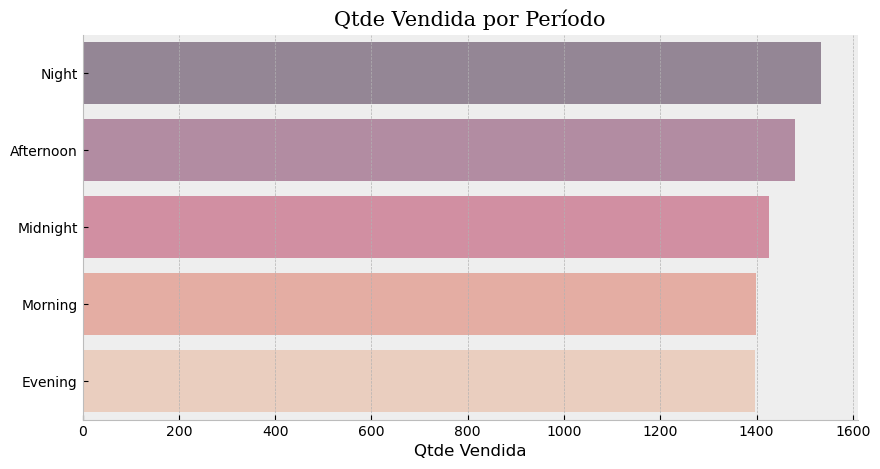

In [15]:
graph1 = data.groupby('time_of_sale')['quantity'].sum().reset_index().sort_values('quantity', ascending = False)

plt.subplots(figsize=(10,5))
plt.title('Qtde Vendida por Período', fontsize = 15, fontname = 'serif')

_ = sns.barplot(data = graph1, x = 'quantity',
            y = 'time_of_sale',
            errorbar = None,
            palette = 'rocket',
            alpha =.5)
plt.ylabel(None)
plt.xlabel('Qtde Vendida')
sns.despine()
plt.show()

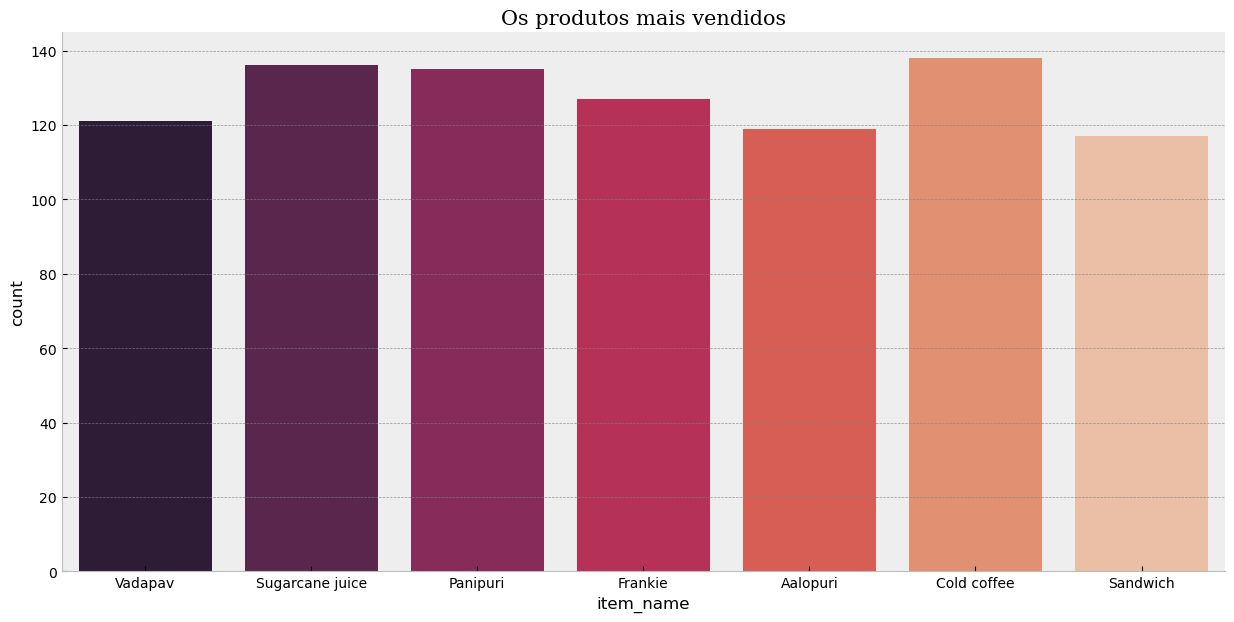

In [16]:
plt.subplots(figsize=(15,7))
plt.title('Os produtos mais vendidos', fontsize = 15, fontname = 'serif')
plt.grid(color = 'gray', alpha = 0.80, linestyle = '--')
_ = sns.countplot(data = data, x = 'item_name', palette = 'rocket')
sns.despine()

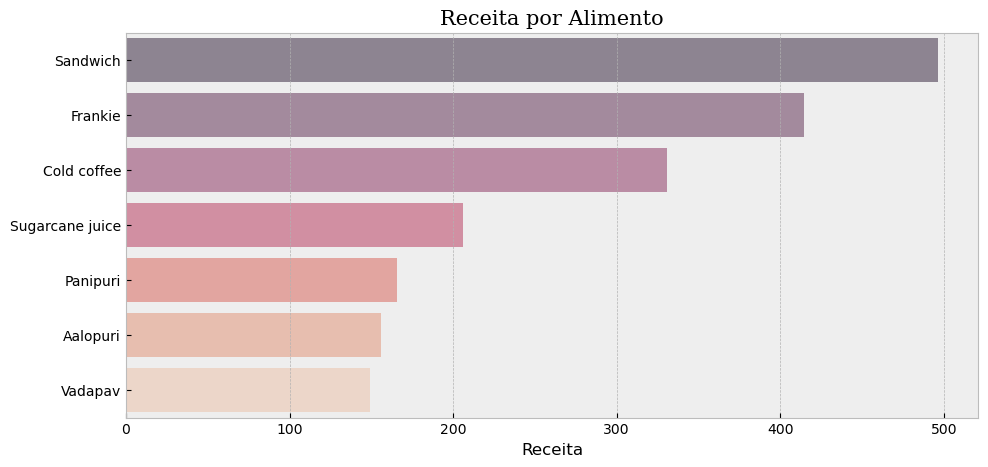

In [17]:
plot_barh = data.groupby('item_name')['transaction_amount'].mean().reset_index()
plot_barh = plot_barh.sort_values('transaction_amount', ascending = False)

plt.subplots(figsize=(11,5))
plt.title('Receita por Alimento', fontsize = 15, fontname = 'serif')
_ = sns.barplot(data = plot_barh, x = 'transaction_amount',
            y = 'item_name',
            palette = 'rocket',
            alpha = 0.5,
            errorbar= None)
plt.xlabel('Receita')
plt.ylabel(None)
plt.show()

In [18]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022,8
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022,11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023,2
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022,10
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening,2022,11


In [19]:
line_plot = data.groupby(['year', 'month'])['transaction_amount'].sum().reset_index()

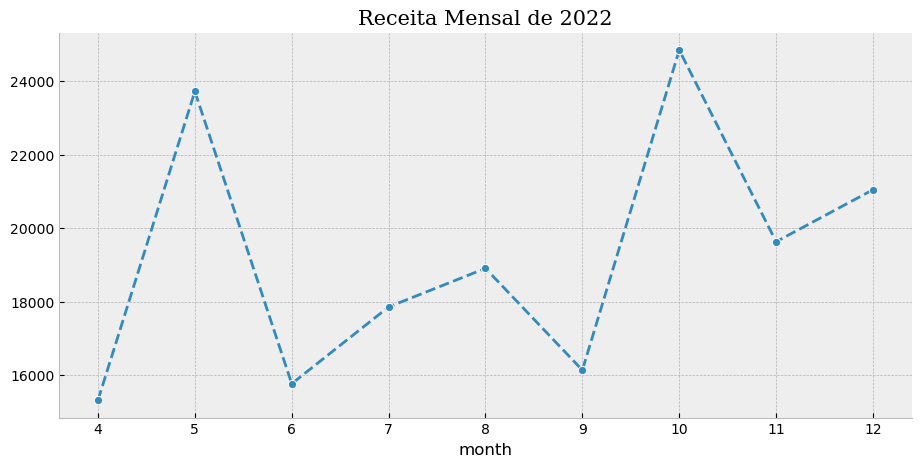

In [20]:
line_plot = line_plot.query('year == 2022')
plt.subplots(figsize=(11,5))
plt.title('Receita Mensal de 2022', fontsize = 15, fontname = 'serif')
_ = sns.lineplot(data = line_plot, x = 'month',
             y = 'transaction_amount',
             palette = 'rocket',
             linestyle = '--',
             marker = 'o')
plt.ylabel(None)
sns.despine()

In [21]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,year,month
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022,8
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022,11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023,2
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022,10
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening,2022,11


In [22]:
pie_plot = data.groupby('transaction_type')['quantity'].sum().reset_index()
pie_plot

,transaction_type,quantity
0,Cash,3943
1,Online,3291


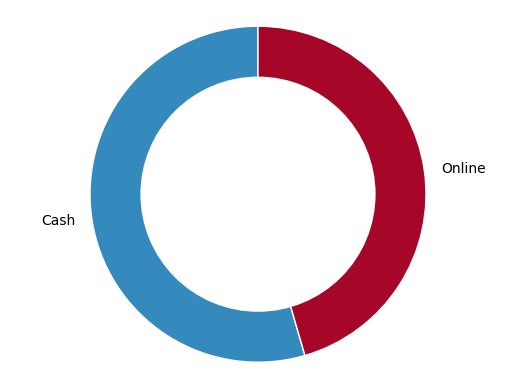

In [23]:
fig1, ax1 = plt.subplots()
ax1.pie(pie_plot['quantity'], labels = pie_plot['transaction_type'],
        startangle = 90,
        wedgeprops = {'linewidth': 1, 'edgecolor': 'white'})

central_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig_ = plt.gcf()
fig_.gca().add_artist(central_circle)
plt.axis('equal')
plt.show()